<a href="https://colab.research.google.com/github/RafaelCaballero/BME/blob/main/mfia/ejemplos/valor_presente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tenemos 3 productos que nos aseguran, para una cantidad dada inicial distintas cantidades año a año.

Por ejemplo, el producto A nos asegura que nos dará 180 euros al 5º año.

El producto B nos dará 30 cada año

El producto C nos irá dando 30, 28, 26, 24, 22 euros cada año.

Si suponemos una inflación del 12% anual ¿cuánto nos da cada producto en valor actual?

In [20]:
import pandas as pd


# Datos de los productos
df = pd.DataFrame({
    "A": [0, 0, 0, 0, 180],
    "B": [30,30,30,30,30],
    "C": [30, 28, 26, 24, 22]
})

# Tasa de inflación
inflacion = 0.12

# años
años = df.index

# Calcular el valor presente de cada flujo
df_descuento = df.copy()
for col in df.columns:
    df_descuento[col] = df[col] / (1 + inflacion) ** años

# Sumar por columnas: cuánto vale en total a precios de hoy cada producto
valor_presente_total = df_descuento.sum()

# Mostrar resultados
print("Valor presente de cada producto (a precio de hoy):")
print(valor_presente_total.round(2))

Valor presente de cada producto (a precio de hoy):
A    114.39
B    121.12
C    106.79
dtype: float64


Veamos el gráfico representando los valores acumulados para cada producto

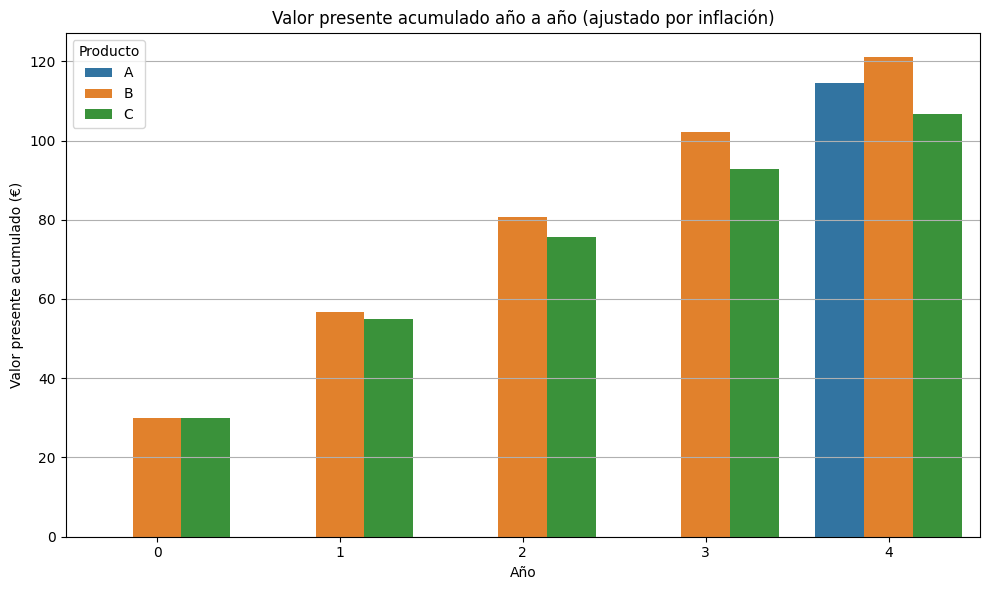

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# totales acumulados
df_acumulado = df_descuento.cumsum()

# Convertir a formato largo (para seaborn)
df_long = df_acumulado.reset_index().melt(id_vars='index', var_name='Producto', value_name='Valor')
df_long.rename(columns={'index': 'Año'}, inplace=True)


# Gráfico con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Año', y='Valor', hue='Producto')
plt.title('Valor presente acumulado año a año (ajustado por inflación)')
plt.ylabel('Valor presente acumulado (€)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()